In [3]:

#######################################################################
#                                                                     #
#  Copyright 2016 Theodore D Drivas                                   #
#                                                                     #
#  This file is part of pyTurbTraj.                                   #
#                                                                     #
#  pyTurbTraj is free software: you can redistribute it and/or modify #
#  it under the terms of the GNU General Public License as published  #
#  by the Free Software Foundation, either version 3 of the License,  #
#  or (at your option) any later version.                             #
#                                                                     #
#  pyTurbTraj is distributed in the hope that it will be useful,      #
#  but WITHOUT ANY WARRANTY; without even the implied warranty of     #
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the      #
#  GNU General Public License for more details.                       #
#                                                                     #
#  You should have received a copy of the GNU General Public License  #
#  along with pyTurbTraj.  If not, see <http://www.gnu.org/licenses/> #
#                                                                     #
#######################################################################

import numpy as np
import mayavi

%matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import subprocess

from tools import *
from mayavi import mlab

In [20]:
databases      = np.array(['channel', 'isotropic'])  
which_database = databases[0]
    
if which_database == 'channel':
    nu    = 5e-5 
    energy_diss = 1
    DB = info
    file_title = '_Channel'
    folder = 'data_channel/history/'
elif which_database == 'isotropic':
    DB = info_iso
    nu    = DB['nu'] 
    energy_diss = DB['diss']
    file_title = '_Isotropic'
    folder = 'data_isotropic/history/'
    
Lx = DB['lx']
Ly = DB['ly']
Lz = DB['lz']

Top    =  Ly/2
Bottom = -Ly/2

t   = get_timeline(which_database, subdiv = 3) #make sure subdiv is same here as in data
tau = t[0] - t

In [28]:
PrandtlNumbers = np.array([1e1, 1e-0, 1e-1, 1e-2])  
npoints    = 1
nparticles = 100

suffix = file_title + '_data_points_{0}_particles_{1}.p'.format(npoints, nparticles)
if which_database == 'channel':
    x       = pickle.load( open( folder + "x"     + suffix, "rb" ) )
    LT      = pickle.load( open( folder + "LT"    + suffix, "rb" ) )
    #LB      = pickle.load( open( folder + "LB"    + suffix, "rb" ) )
    HT      = pickle.load( open( folder + "HT"    + suffix, "rb" ) )
    disp    = pickle.load( open( folder + "disp"  + suffix, "rb" ) )
elif which_database == 'isotropic':
    x       = pickle.load( open( folder + "x"     + suffix, "rb" ) )
    disp    = pickle.load( open( folder + "disp"  + suffix, "rb" ) )

<IPython.core.display.Javascript object>


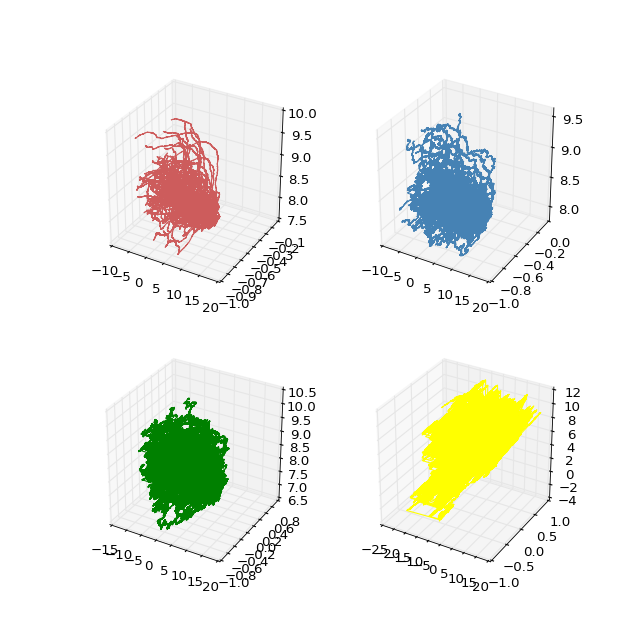

In [11]:
space_indx = 0

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221, projection = '3d')
ax2 = fig.add_subplot(222, projection = '3d')
ax3 = fig.add_subplot(223, projection = '3d')
ax4 = fig.add_subplot(224, projection = '3d')
axis = np.array([ax1, ax2, ax3, ax4])

colors = np.array(['Indianred', 'Steelblue','green', 'yellow'])
for i in range(x[1].shape[2]):
    for j in range(x.shape[0]):
        axis[j].plot(x[j][:, space_indx, i, 0],
                     x[j][:, space_indx, i, 1],
                     x[j][:, space_indx, i, 2],
                     color = colors[j])

<IPython.core.display.Javascript object>


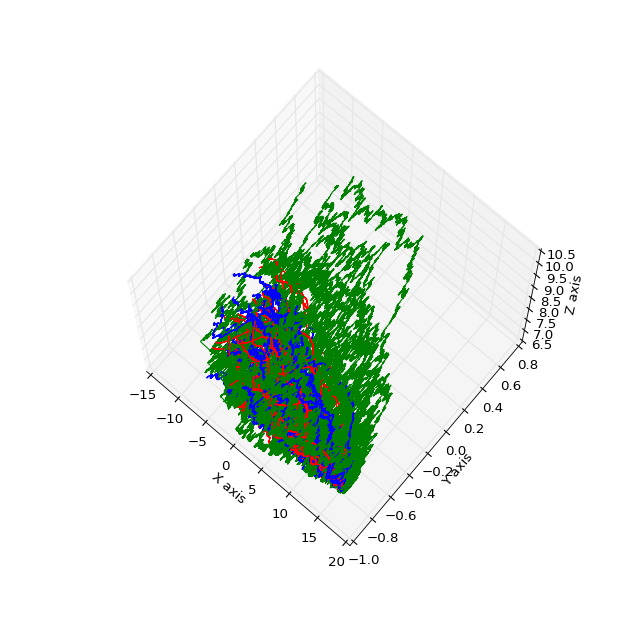

In [12]:
space_indx = 0

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, projection = '3d')

colors = np.array(['red', 'blue','green'])
for i in range(50):
    for j in range(3):
        ax.plot(x[j][:, space_indx, i, 0],
                x[j][:, space_indx, i, 1],
                x[j][:, space_indx, i, 2],
                color = colors[j])
#ax.set_xlim3d(-10 , 20)
#ax.set_ylim3d(-Ly/2, Ly/2)
#ax.set_zlim3d(6.5, 3*np.pi) 

ax.view_init(elev=70., azim=-47)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')    

<IPython.core.display.Javascript object>


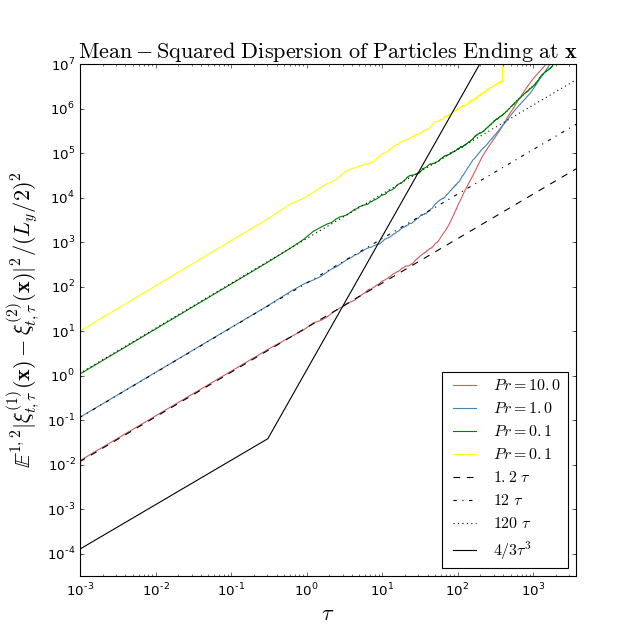

In [47]:
space_point_index = 0


kolmogorov_time = (nu/energy_diss)**.5
kolmogorov_length = nu**(3/4.)*energy_diss**(-1/4.)

half_Channel_Width = 0.5*(Top-Bottom)

kappa1 = nu/PrandtlNumbers[1]
kappa2 = nu/PrandtlNumbers[2]
kappa3 = nu/PrandtlNumbers[3]
kappa4 = nu/PrandtlNumbers[0]

Tau = tau/float(kolmogorov_time)
diffusion_dispersion1 = 12*kappa1*Tau/nu
diffusion_dispersion2 = 12*kappa2*Tau/nu
diffusion_dispersion3 = 12*kappa3*Tau/nu
diffusion_dispersion4 = 12*kappa4*Tau/nu
Richardson_dispersion = (4/3.)*Tau**3

disper1 = disp[0,:, space_point_index]/float(kolmogorov_length**2)
disper2 = disp[1,:, space_point_index]/float(kolmogorov_length**2)
disper3 = disp[2,:, space_point_index]/float(kolmogorov_length**2)
disper4 = disp[3,:, space_point_index]/float(kolmogorov_length**2)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(Tau, disper1, color = 'Indianred', label = '$Pr = {0}$'.format(PrandtlNumbers[0]))
ax.plot(Tau, disper2, color = 'Steelblue', label = '$Pr = {0}$'.format(PrandtlNumbers[1]))
ax.plot(Tau, disper3, color = 'green', label = '$Pr = {0}$'.format(PrandtlNumbers[2]))
ax.plot(Tau, disper4, color = 'yellow', label = '$Pr = {0}$'.format(PrandtlNumbers[2]))
ax.plot(Tau, diffusion_dispersion1,   color = 'black', linestyle = 'dashed',  label = '$1.2\ \\tau$')  #\\nu \\tau if no divide by nu
ax.plot(Tau, diffusion_dispersion2,   color = 'black', linestyle = 'dashdot', label = '$12\  \\tau$')
ax.plot(Tau, diffusion_dispersion3,   color = 'black', linestyle = 'dotted',  label = '$120\ \\tau$')
ax.plot(Tau, Richardson_dispersion,   color = 'black', linestyle = 'solid',   label = '$4/3 \\tau^3$')
ax.set_xlim([10**(-3),Tau[-1]])
ax.set_ylim([10**(-4.5),10**(7)])
ax.set_title('$\\rm Mean-Squared\ Dispersion\ of\ Particles\ Ending\ at\ \\mathbf{x}$', fontsize=20)
ax.set_xlabel('$\\tau $', fontsize=20)
ax.set_ylabel('$\mathbb{E}^{1,2} |{\\xi}^{(1)}_{t,\\tau}(\\mathbf{x})-{\\xi}^{(2)}_{t,\\tau}(\\mathbf{x})|^2 /(L_y/2)^2$', fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc ="best")

In [37]:
t  = get_timeline('channel', 
                      subdiv = 3) 
print t[0]

25.9935
